In [1]:
import pandas as pd
import numpy as np

import glob
from PIL import Image

# from sklearn.model_selection import train_test_split

In [2]:
path_name = '/Users/alisongarrett/Documents/GitHub/metis/Deep Learning/Project/data/process/train/edible'
tr_edible_fl = glob.glob(path_name + '/*.jpeg')

path_name = '/Users/alisongarrett/Documents/GitHub/metis/Deep Learning/Project/data/process/train/poisonous'
tr_poison_fl = glob.glob(path_name + '/*.jpeg')

In [3]:
X_train_edible = np.array([np.array(Image.open(fn)) for fn in tr_edible_fl])
X_train_poison = np.array([np.array(Image.open(fn)) for fn in tr_poison_fl])

In [4]:
X_train = np.vstack((X_train_edible, X_train_poison))
y_train = np.concatenate((np.zeros((3933,1)), np.ones((2881,1))), axis=0)

In [6]:
X_train.shape

(6814, 32, 32)

In [7]:
X_train = np.reshape(X_train, (6814, 1024))

In [8]:
X_train.shape

(6814, 1024)

In [9]:
y_train.shape

(6814, 1)

In [10]:
y_train = y_train.ravel()

In [11]:
y_train.shape

(6814,)

In [12]:
path_name = '/Users/alisongarrett/Documents/GitHub/metis/Deep Learning/Project/data/process/test/edible'
te_edible_fl = glob.glob(path_name + '/*.jpeg')

path_name = '/Users/alisongarrett/Documents/GitHub/metis/Deep Learning/Project/data/process/test/poisonous'
te_poison_fl = glob.glob(path_name + '/*.jpeg')

In [13]:
X_test_edible = np.array([np.array(Image.open(fn)) for fn in te_edible_fl])
X_test_poison = np.array([np.array(Image.open(fn)) for fn in te_poison_fl])

In [14]:
X_test_edible.shape

(457, 32, 32)

In [15]:
X_test_poison.shape

(407, 32, 32)

In [16]:
X_test = np.vstack((X_test_edible, X_test_poison))
y_test = np.concatenate((np.zeros((457,1)), np.ones((407,1))), axis=0)

In [17]:
X_test.shape

(864, 32, 32)

In [18]:
X_test = np.reshape(X_test, (864, 1024))

In [19]:
X_test.shape

(864, 1024)

In [20]:
y_test.shape

(864, 1)

In [21]:
y_test = y_test.ravel()

In [22]:
y_test.shape

(864,)

In [ ]:
# X_trn, X_val, y_trn, y_val = (train_test_split(X_train, y_train, 
#                                                      test_size = .2, random_state = 42))

In [30]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score, roc_curve

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

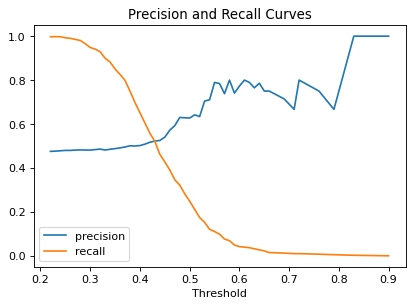

In [31]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

In [32]:
print('Random Forest:') 
print('Train: %.3f' % (rf.score(X_train, y_train)))
print(f"  mae: {metrics.mean_absolute_error(y_test, rf.predict(X_test)):,.2f}")
print(f"  mse: {metrics.mean_squared_error(y_test, rf.predict(X_test)):,.2f}")
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, rf.predict(X_test)>0.4), roc_auc_score(y_test, rf.predict(X_test)>0.4))) 

Random Forest:
Train: 1.000
  mae: 0.42
  mse: 0.42
Test F1: 0.356, Test AUC: 0.558


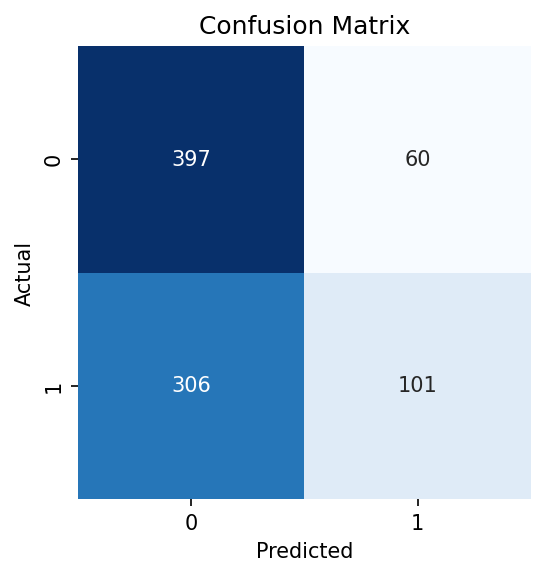

In [41]:
confusion = confusion_matrix(y_test, (rf.predict(X_test))>0.45)
plt.figure(dpi=150)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, cbar=False, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

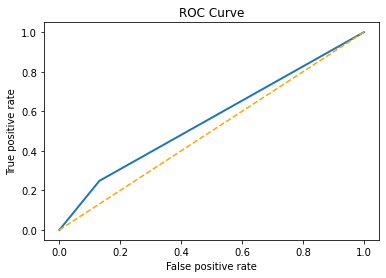

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict(X_test))

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='orange',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');